In [1]:
#%load_ext autoreload
#%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
from comet_ml import Experiment

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
sns.set_theme()

from ift6758.models.utils import preprocess, predict_model,save_metrics_and_models_on_comet
from ift6758.models.plotter import *
from dotenv import load_dotenv

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
import time

from comet_ml import API

In [2]:
url = 'https://drive.google.com/file/d/1kM__riNHRPx5GsyuOH3yhiql3OZvwmuP/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
df_train = df.loc[df['season'] !=  20192020]
df_train

,event_Idx,period,periodTime,id_team_that_shot,name_team_that_shot,result_event,x_coord,y_coord,distance,angle,...,angle_change,speed,powerplay,team_that_shot_nb,other_team_nb,type_season,id_game,season,team_away_name,team_home_name
0,9,1,01:27,13,Florida Panthers,Shot,-35.0,31.0,63.134776,-0.513252,...,0.000000,4.590146,0,5,5,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
1,12,1,01:55,13,Florida Panthers,Goal,-78.0,5.0,13.000000,-0.394791,...,0.000000,0.712422,0,5,5,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
2,14,1,02:06,13,Florida Panthers,Shot,-83.0,-20.0,21.189620,1.234122,...,0.000000,7.761422,0,5,5,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
3,18,1,02:54,2,New York Islanders,Shot,48.0,25.0,48.877398,0.536911,...,0.000000,14.840822,0,5,5,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
4,19,1,02:59,13,Florida Panthers,Shot,-57.0,14.0,35.846897,-0.401229,...,-0.222013,21.114924,0,5,5,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332737,276,3,15:37,28,San Jose Sharks,Shot,67.0,-19.0,29.832868,-0.690446,...,0.000000,2.000918,0,5,5,regular_season,2018021271,20182019,Colorado Avalanche,San Jose Sharks
332738,281,3,16:33,21,Colorado Avalanche,Shot,-78.0,1.0,12.041595,-0.083141,...,0.000000,0.851661,0,5,5,regular_season,2018021271,20182019,Colorado Avalanche,San Jose Sharks
332739,291,3,18:39,21,Colorado Avalanche,Shot,-82.0,10.0,12.806248,-0.896055,...,0.000000,0.659472,0,5,5,regular_season,2018021271,20182019,Colorado Avalanche,San Jose Sharks
332740,292,3,18:40,21,Colorado Avalanche,Shot,-81.0,1.0,9.055385,-0.110657,...,0.785398,9.055385,0,5,5,regular_season,2018021271,20182019,Colorado Avalanche,San Jose Sharks


## Question 3.1

In [4]:
# preprocess
X, Y ,df_train_preprocessed,_ =  preprocess(df_train,features = 'distance', standarize=False)

# train/test split
X_train, X_val, y_train, y_val = train_test_split(X,Y,random_state = 42, shuffle=True, stratify=Y)

# define and train model
model = LogisticRegression()

# fit_model
model.fit(X_train.values.reshape(-1,1),y_train)
y_val_pred1,y_val_prob1 = predict_model(model,X_val.values.reshape(-1,1))

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/princesslove/itf-6758-team-4/619524b4354141538df17c9a0da193d3

/home/hanifa/ift6758-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
COMET WARNING: Converting metric value ''question3.1'' into a string using str(), resulting string might be invalid
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/princesslove/itf-6758-tea

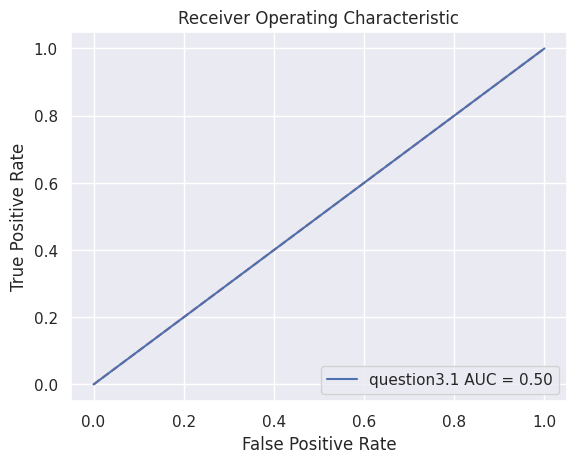

<Figure size 640x480 with 0 Axes>

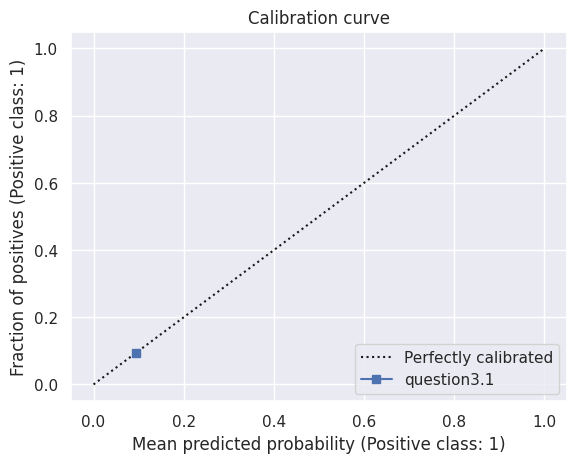

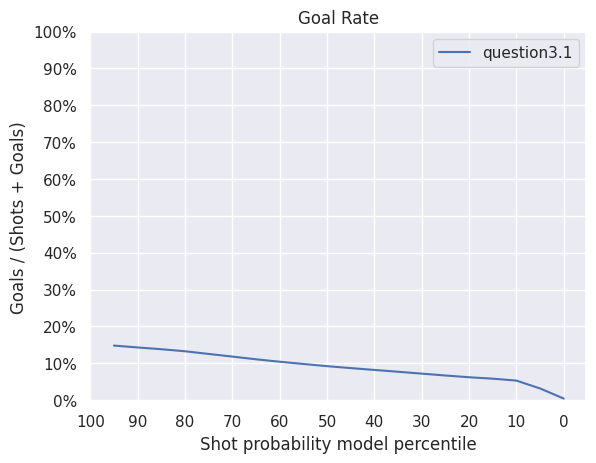

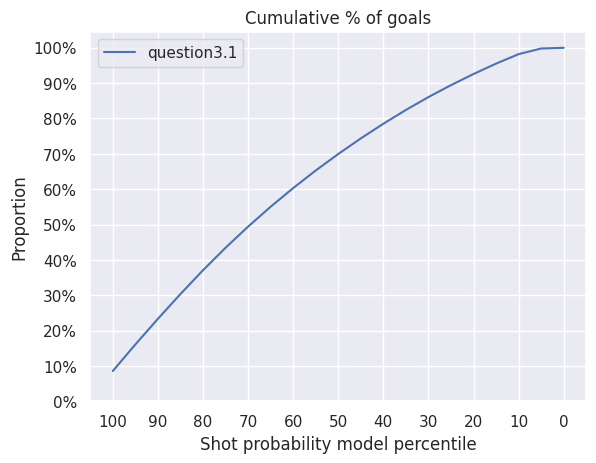

In [6]:
name_experiment = "question3.1"
model_dir = "LR"

save_metrics_and_models_on_comet(model,y_val,y_val_pred1,y_val_prob1,model_names=name_experiment,model_dir=model_dir,name_experiment=name_experiment,register_model = False, sklearn_model=True)

## Question 3.2

In [7]:
# preprocess
X, Y ,df_train_preprocessed,_ =  preprocess(df_train,features = 'angle', standarize=False)

# train/test split
X_train, X_val, y_train, y_val = train_test_split(X,Y,random_state = 42, shuffle=True, stratify=Y)

# define and train model
model = LogisticRegression()

# fit_model
model.fit(X_train.values.reshape(-1,1),y_train)
y_val_pred2,y_val_prob2 = predict_model(model,X_val.values.reshape(-1,1))

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/princesslove/itf-6758-team-4/bee13f6bb9974204af3aad6472f8ed36

/home/hanifa/ift6758-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
COMET WARNING: Converting metric value ''question3.2'' into a string using str(), resulting string might be invalid
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/princesslove/itf-6758-tea

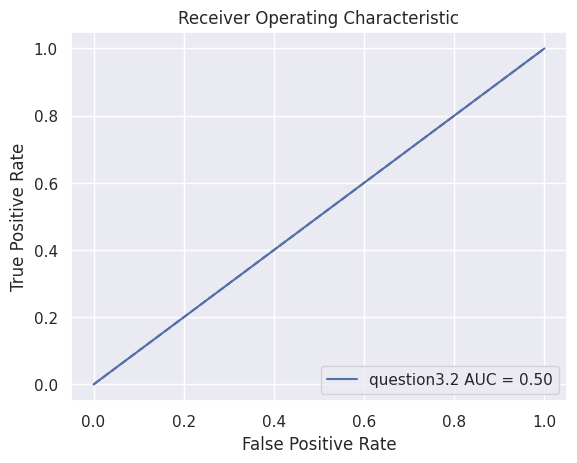

<Figure size 640x480 with 0 Axes>

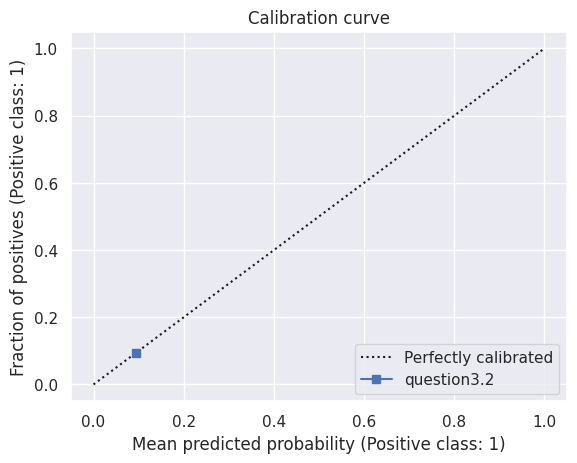

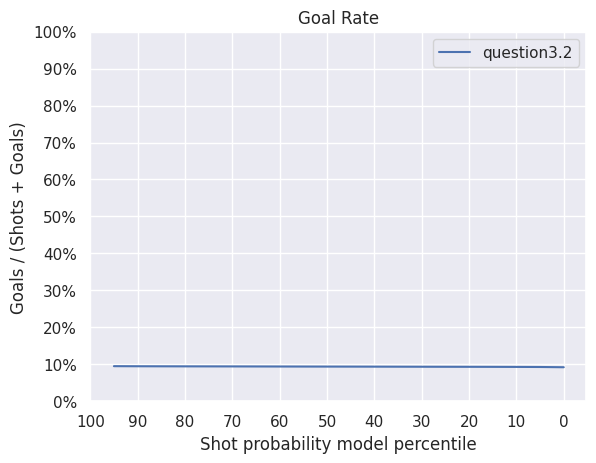

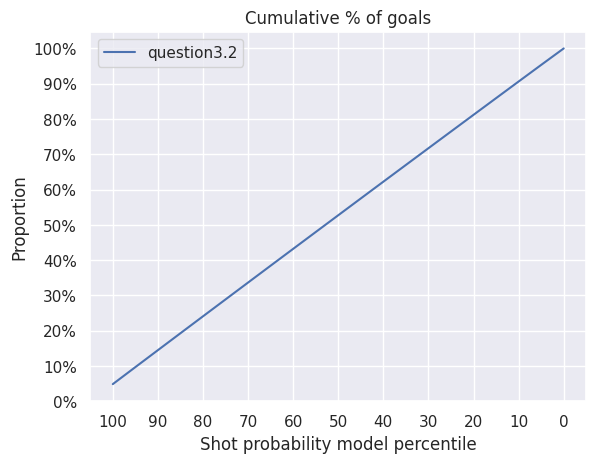

In [8]:
name_experiment = "question3.2"
model_dir = "LR"

save_metrics_and_models_on_comet(model,y_val,y_val_pred2,y_val_prob2,model_names=name_experiment,model_dir=model_dir,name_experiment=name_experiment,register_model = False, sklearn_model=True)

## Question 3.3


In [9]:
# preprocess
X, Y ,df_train_preprocessed,_ =  preprocess(df_train,features = ['distance', 'angle'], standarize=False)

# train/test split
X_train, X_val, y_train, y_val = train_test_split(X,Y,random_state = 42, shuffle=True, stratify=Y)

# define and train model
model = LogisticRegression()

# fit_model
model.fit(X_train,y_train)
y_val_pred3,y_val_prob3 = predict_model(model,X_val)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/princesslove/itf-6758-team-4/6acf79338c3745a69cf235353a521206

/home/hanifa/ift6758-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
COMET WARNING: Converting metric value ''question3.3'' into a string using str(), resulting string might be invalid
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/princesslove/itf-6758-tea

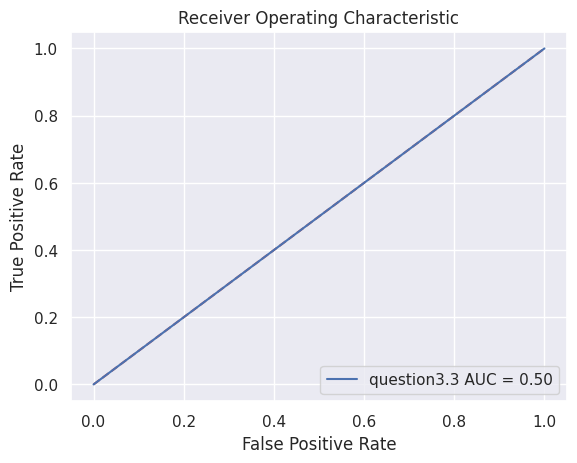

<Figure size 640x480 with 0 Axes>

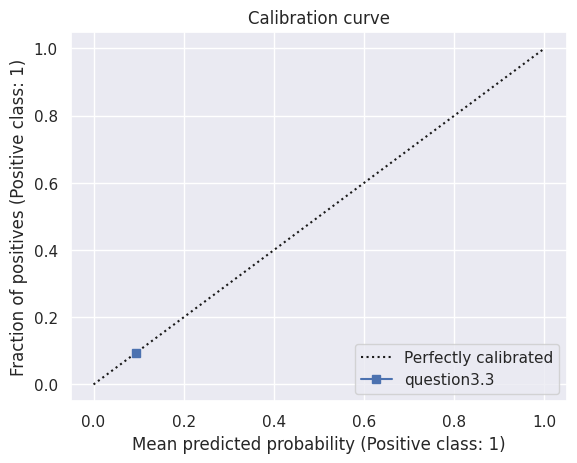

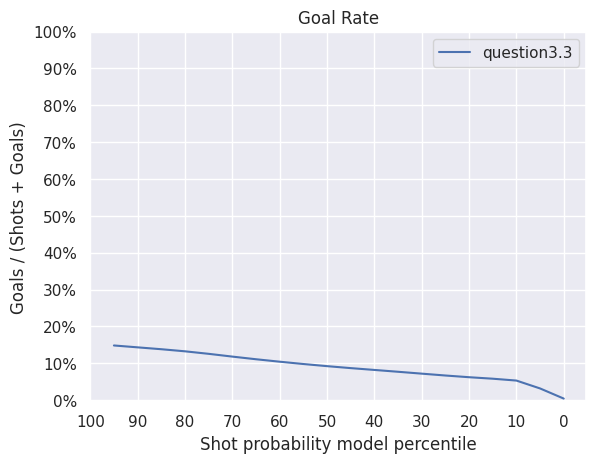

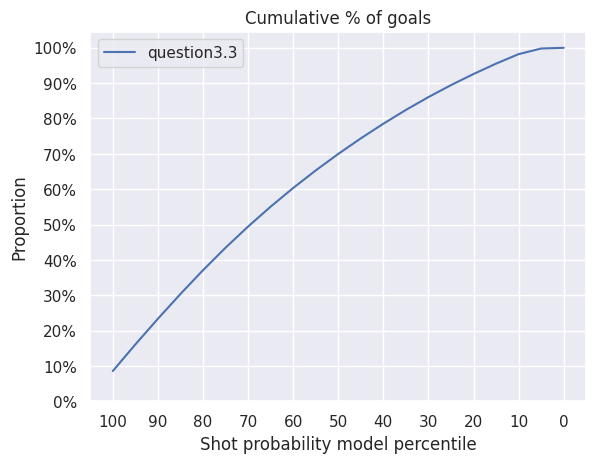

In [10]:
name_experiment = "question3.3"
model_dir = "LR"

save_metrics_and_models_on_comet(model,y_val,y_val_pred3,y_val_prob3,model_names=name_experiment,model_dir=model_dir,name_experiment=name_experiment,register_model = False, sklearn_model=True)

## Question 3.4

In [11]:
# preprocess
X, Y ,df_train_preprocessed,_ =  preprocess(df_train,features = [], standarize=False)

# train/test split
X_train, X_val, y_train, y_val = train_test_split(X,Y,random_state = 42, shuffle=True, stratify=Y)

# define and train model
model = DummyClassifier(strategy='most_frequent')

# fit_model
model.fit(X_train,y_train)
y_val_pred4,y_val_prob4 = predict_model(model,X_val)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/princesslove/itf-6758-team-4/709980098d4441c6b640eeef7f94451c

/home/hanifa/ift6758-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
COMET WARNING: Converting metric value ''question3.4'' into a string using str(), resulting string might be invalid
/home/hanifa/ift6758-venv/DS Project/IFT6758_projet/project-template-main/ift6758/models/plotter.py:85: RuntimeWarning: invalid value encountered in divide
  cumulative_sum = np.cumsum(value[::-1])/np.sum(value)
COMET INFO: ---------------------------
COMET INFO: Comet

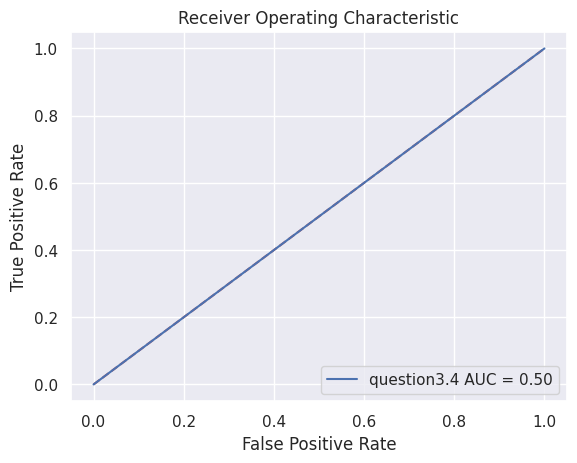

<Figure size 640x480 with 0 Axes>

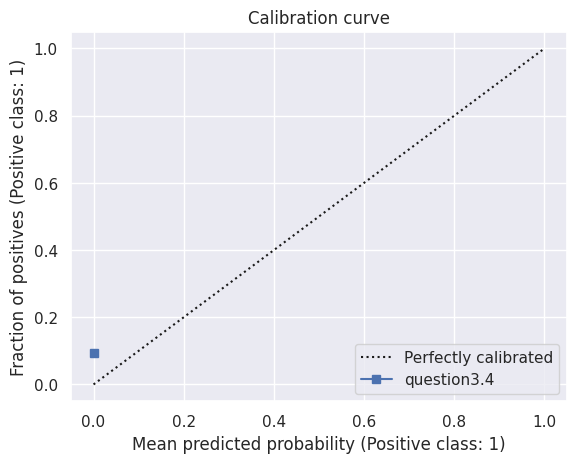

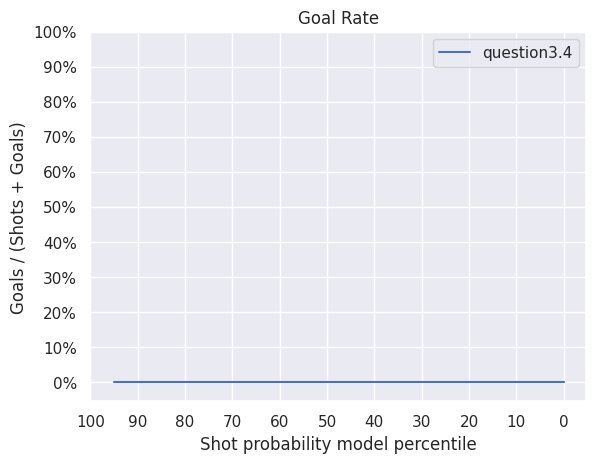

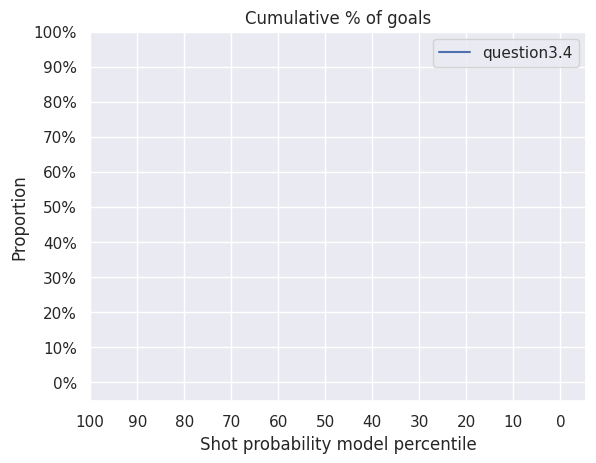

In [12]:
name_experiment = "question3.4"
model_dir = "LR"

save_metrics_and_models_on_comet(model,y_val,y_val_pred4,y_val_prob4,model_names=name_experiment,model_dir=model_dir,name_experiment=name_experiment,register_model = False, sklearn_model=True)

/home/hanifa/ift6758-venv/DS Project/IFT6758_projet/project-template-main/ift6758/models/plotter.py:81: RuntimeWarning: invalid value encountered in divide
  cumulative_sum = np.cumsum(value[::-1])/np.sum(value)


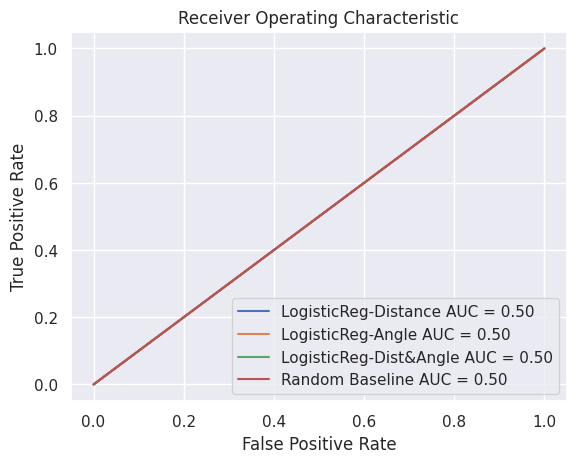

<Figure size 640x480 with 0 Axes>

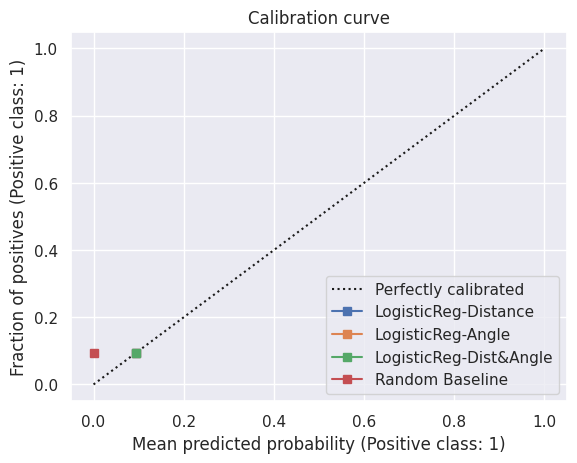

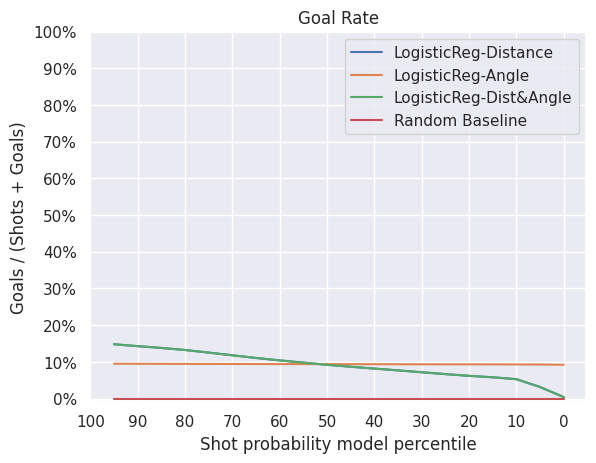

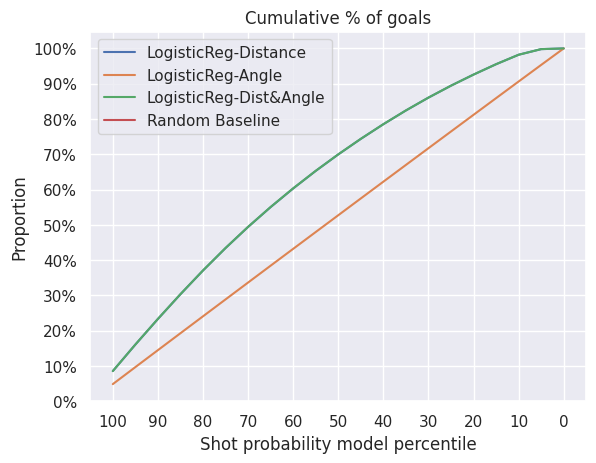

In [13]:
y_val_pred_list= [y_val_pred1, y_val_pred2, y_val_pred3, y_val_pred4]
y_val_prob_list= [y_val_prob1, y_val_prob2, y_val_prob3, y_val_prob4]

model_names = ['LogisticReg-Distance','LogisticReg-Angle', 'LogisticReg-Dist&Angle', 'Random Baseline']

roc = log_ROC(y_val,y_val_pred_list,model_names=model_names)
cal = log_Calibration(y_val,y_val_prob_list,model_names=model_names)
goalR = log_GoalRate(y_val_prob_list,model_names=model_names)
cumul = log_Cumulative(y_val_prob_list,model_names=model_names)